<a href="https://colab.research.google.com/github/Maffert/challenge-telecom-x/blob/main/challenge_telecom_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inicio de proyecto: **Extracción de Datos** 📌

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# Revisión de datos: **Transformación** 🔧

In [3]:
# Columnas con datos anidados, se identifican y normalizan

columnas_anidadas = ['customer', 'phone', 'internet', 'account']
columnas_normalizadas = []

for col in columnas_anidadas:
    df_col = pd.json_normalize(df[col])
    columnas_normalizadas.append(df_col)
df_normalizado = pd.concat(columnas_normalizadas, axis=1)

In [4]:
df = pd.concat(
    [df[['customerID', 'Churn']], df_normalizado],
    axis=1
)

pd.set_option('display.max_columns', None)

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [6]:
#Revisando valores unicos

for col in df.select_dtypes(include='object').columns:
    print(f'\n{col}')
    print(df[col].unique())



customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Churn
['No' 'Yes' '']

gender
['Female' 'Male']

Partner
['Yes' 'No']

Dependents
['Yes' 'No']

PhoneService
['Yes' 'No']

MultipleLines
['No' 'Yes' 'No phone service']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes' 'No internet service']

OnlineBackup
['Yes' 'No' 'No internet service']

DeviceProtection
['No' 'Yes' 'No internet service']

TechSupport
['Yes' 'No' 'No internet service']

StreamingTV
['Yes' 'No' 'No internet service']

StreamingMovies
['No' 'Yes' 'No internet service']

Contract
['One year' 'Month-to-month' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Charges.Total
['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [7]:
# Revisando si hay valores duplicados
df.duplicated().any()

np.False_

In [8]:
# Revisando datos vacíos
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [9]:
# Revisando los valores nulos
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


## Manejo de Incoherencias 🛠️

In [10]:
# Charges.Total está como object/ se cambia a float64
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [11]:
# Eliminando vacíos

df['Churn'] = df['Churn'].replace('', np.nan)

df = df.dropna(subset=['Churn'])

In [12]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64


In [13]:
df['Charges.Total'] = df['Charges.Total'].replace('', np.nan)

df = df.dropna(subset=['Charges.Total'])

In [14]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

## Creación de columna: Cuentas Diarias 🧮

In [16]:
# Dividiendo la facturación mensual entre 30 (días del mes)
df['Cuentas_Diarias'] = (df['Charges.Monthly'] / 30).round(4)
df


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.1867
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.9967
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.4633
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.2667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.7967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.8383
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.8367
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.6767
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.2617


## Estandarización 🔄

In [17]:
# Se cambian los nombres de las columnas para mejor comprensión
df = df.rename(columns={
    'customerID': 'Cliente_ID',
    'Churn': 'Evasion',
    'gender': 'Genero',
    'SeniorCitizen': 'Adulto_Mayor',
    'Partner': 'Tiene_Pareja',
    'Dependents': 'Tiene_Dependientes',
    'tenure': 'Meses_Cliente',
    'PhoneService': 'Servicio_Telefono',
    'MultipleLines': 'Multiples_Lineas',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Respaldo_Online',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Peliculas',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Factura_Digital',
    'PaymentMethod': 'Metodo_Pago',
    'Charges.Monthly': 'Cargo_Mensual',
    'Charges.Total': 'Cargo_Total'
})
df

,Cliente_ID,Evasion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Cliente,Servicio_Telefono,Multiples_Lineas,Servicio_Internet,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.1867
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.9967
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.4633
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.2667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.7967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.8383
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.8367
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.6767
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.2617


In [18]:
#Reemplazo/traducción de respuestas

df['Evasion'] = df['Evasion'].replace({'No': 'No', 'Yes': 'Si'})
df['Genero'] = df['Genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df['Tiene_Pareja'] = df['Tiene_Pareja'].replace({'No': 'No', 'Yes': 'Si'})
df['Tiene_Dependientes'] = df['Tiene_Dependientes'].replace({'No': 'No', 'Yes': 'Si'})
df['Servicio_Telefono'] = df['Servicio_Telefono'].replace({'No': 'No', 'Yes': 'Si'})
df['Multiples_Lineas'] = df['Multiples_Lineas'].replace({'No': 'No', 'Yes': 'Si','No phone service': 'Sin Servicio de Telefono'})
df['Servicio_Internet'] = df['Servicio_Internet'].replace({'No': 'No', 'Yes': 'Si','Fiber optic': 'Fibra Óptica'})
df['Seguridad_Online'] = df['Seguridad_Online'].replace({'No': 'No', 'Yes': 'Si','No internet service': 'Sin Servicio de Internet'})
df['Respaldo_Online'] = df['Respaldo_Online'].replace({'No': 'No', 'Yes': 'Si','No internet service': 'Sin Servicio de Internet'})
df['Proteccion_Dispositivo'] = df['Proteccion_Dispositivo'].replace({'No': 'No', 'No internet service': 'Sin Servicio de Internet', 'Yes': 'Si'})
df['Soporte_Tecnico'] = df['Soporte_Tecnico'].replace({'No': 'No', 'Yes': 'Si','No internet service': 'Sin Servicio de Internet'})
df['Streaming_TV'] = df['Streaming_TV'].replace({'No': 'No', 'Yes': 'Si','No internet service': 'Sin Servicio de Internet'})
df['Streaming_Peliculas'] = df['Streaming_Peliculas'].replace({'No': 'No', 'Yes': 'Si','No internet service': 'Sin Servicio de Internet'})
df['Tipo_Contrato'] = df['Tipo_Contrato'].replace({'One year': 'Anual', 'Month-to-month': 'Mensual','Two year': 'Bienal'})
df['Factura_Digital'] = df['Factura_Digital'].replace({'No': 'No', 'Yes': 'Si'})
df['Metodo_Pago'] = df['Metodo_Pago'].replace({'Mailed check': 'Cheque enviado por correo','Electronic check': 'Cheque electrónico',
    'Credit card (automatic)': 'Tarjeta de crédito (automático)',
    'Bank transfer (automatic)': 'Transferencia bancaria (automática)'})
df

,Cliente_ID,Evasion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Cliente,Servicio_Telefono,Multiples_Lineas,Servicio_Internet,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cuentas_Diarias
0,0002-ORFBO,No,Femenino,0,Si,Si,9,Si,No,DSL,No,Si,No,Si,Si,No,Anual,Si,Cheque enviado por correo,65.60,593.30,2.1867
1,0003-MKNFE,No,Masculino,0,No,No,9,Si,Si,DSL,No,No,No,No,No,Si,Mensual,No,Cheque enviado por correo,59.90,542.40,1.9967
2,0004-TLHLJ,Si,Masculino,0,No,No,4,Si,No,Fibra Óptica,No,No,Si,No,No,No,Mensual,Si,Cheque electrónico,73.90,280.85,2.4633
3,0011-IGKFF,Si,Masculino,1,Si,No,13,Si,No,Fibra Óptica,No,Si,Si,No,Si,Si,Mensual,Si,Cheque electrónico,98.00,1237.85,3.2667
4,0013-EXCHZ,Si,Femenino,1,Si,No,3,Si,No,Fibra Óptica,No,No,No,Si,Si,No,Mensual,Si,Cheque enviado por correo,83.90,267.40,2.7967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Femenino,0,No,No,13,Si,No,DSL,Si,No,No,Si,No,No,Anual,No,Cheque enviado por correo,55.15,742.90,1.8383
7263,9992-RRAMN,Si,Masculino,0,Si,No,22,Si,Si,Fibra Óptica,No,No,No,No,No,Si,Mensual,Si,Cheque electrónico,85.10,1873.70,2.8367
7264,9992-UJOEL,No,Masculino,0,No,No,2,Si,No,DSL,No,Si,No,No,No,No,Mensual,Si,Cheque enviado por correo,50.30,92.75,1.6767
7265,9993-LHIEB,No,Masculino,0,Si,Si,67,Si,No,DSL,Si,No,Si,Si,No,Si,Bienal,No,Cheque enviado por correo,67.85,4627.65,2.2617


#Carga y análisis 📊

In [19]:
# Se inicia calculando: media, mediana y desviación estandar
df.describe()

,Adulto_Mayor,Meses_Cliente,Cargo_Mensual,Cargo_Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159941
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608300
25%,0.000000,9.000000,35.587500,401.450000,1.186275
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995425
max,1.000000,72.000000,118.750000,8684.800000,3.958300


### Distribución de evasión de clientes

In [20]:
#Distribución de evasión de clientes
df['Evasion'].value_counts(normalize=True) * 100


,proportion
Evasion,
No,73.421502
Si,26.578498


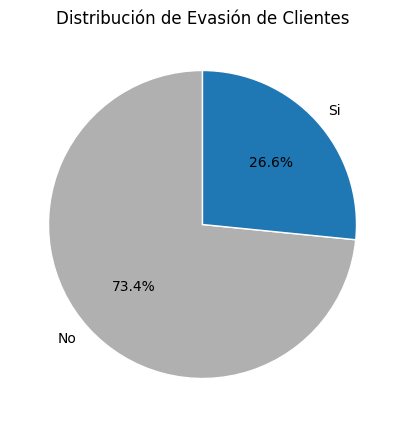

In [21]:
# Conteo de evasión

conteo_evasion = df['Evasion'].value_counts()

colores = {'No':'#B0B0B0', 'Si':'#1F77B4'}
lista_colores = [colores[i] for i in conteo_evasion.index]

fig, ax = plt.subplots(figsize=(5,5))
ax.pie(
    conteo_evasion,
    labels=conteo_evasion.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=lista_colores,
    wedgeprops={'edgecolor':'white'}
)


ax.set_title('Distribución de Evasión de Clientes')


plt.savefig('/content/graficas/distribucion_de_evasion_de_clientes.png', dpi=150)
plt.show()



Esta gráfica muestra qué tan grande es el problema de la evasión: **No = Clientes que permanecen/ Si= Clientes que cancelaron**

### Recuento de evasión por variables categóricas

In [22]:
# Revisemos las categorías

variables_categoricas = ['Genero','Tipo_Contrato','Metodo_Pago']

for var in variables_categoricas:
    print(f'\nEvasión por {var}')
    print(pd.crosstab(df[var], df['Evasion']))




Evasión por Genero
Evasion      No   Si
Genero              
Femenino   2544  939
Masculino  2619  930

Evasión por Tipo_Contrato
Evasion          No    Si
Tipo_Contrato            
Anual          1306   166
Bienal         1637    48
Mensual        2220  1655

Evasión por Metodo_Pago
Evasion                                No    Si
Metodo_Pago                                    
Cheque electrónico                   1294  1071
Cheque enviado por correo            1296   308
Tarjeta de crédito (automático)      1289   232
Transferencia bancaria (automática)  1284   258


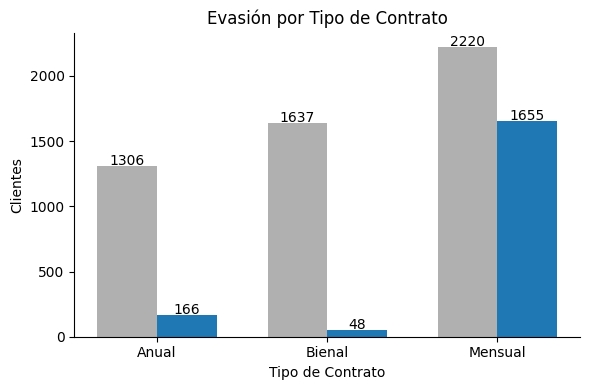

In [23]:
# Evasión por Tipo_Contrato

tabla_tipo = pd.crosstab(df['Tipo_Contrato'], df['Evasion'])

fig, ax = plt.subplots(figsize=(6,4))
ancho = 0.35
x = range(len(tabla_tipo))

# Barras
ax.bar([i - ancho/2 for i in x], tabla_tipo['No'], width=ancho, color='#B0B0B0')
ax.bar([i + ancho/2 for i in x], tabla_tipo['Si'], width=ancho, color='#1F77B4')

# Valores
for i in x:
    ax.text(i - ancho/2, tabla_tipo['No'].iloc[i] + 10, tabla_tipo['No'].iloc[i], ha='center')
    ax.text(i + ancho/2, tabla_tipo['Si'].iloc[i] + 10, tabla_tipo['Si'].iloc[i], ha='center')

# Etiquetas y título
ax.set_xlabel('Tipo de Contrato')
ax.set_ylabel('Clientes')
ax.set_title('Evasión por Tipo de Contrato')
ax.set_xticks(x)
ax.set_xticklabels(tabla_tipo.index)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

plt.savefig('graficas/evasion_por_tipo_contrato.png')
plt.show()


La gráfica muestra que la evasión es mayor en los contratos **mensuales**. Esto indica que a mayor compromiso del cliente, menor es la probabilidad de cancelación.

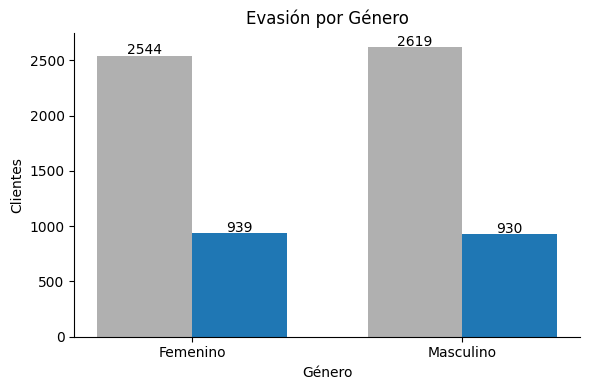

In [24]:
#Evasión por Genero
tabla_genero = pd.crosstab(df['Genero'], df['Evasion'])

fig, ax = plt.subplots(figsize=(6,4))
ancho = 0.35
x = range(len(tabla_genero))

# Barras
ax.bar([i - ancho/2 for i in x], tabla_genero['No'], width=ancho, color='#B0B0B0')
ax.bar([i + ancho/2 for i in x], tabla_genero['Si'], width=ancho, color='#1F77B4')

# Valores
for i in x:
    ax.text(i - ancho/2, tabla_genero['No'].iloc[i] + 10, tabla_genero['No'].iloc[i], ha='center')
    ax.text(i + ancho/2, tabla_genero['Si'].iloc[i] + 10, tabla_genero['Si'].iloc[i], ha='center')

# Etiquetas y título
ax.set_xlabel('Género')
ax.set_ylabel('Clientes')
ax.set_title('Evasión por Género')
ax.set_xticks(x)
ax.set_xticklabels(tabla_genero.index)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

plt.savefig('/content/graficas/evasion_por_genero.png')
plt.show()

La gráfica muestra que la evasión es muy similar entre hombres y mujeres, sin diferencias significativas por género. Esto indica que el género **NO** es un factor determinante en la cancelación del servicio.

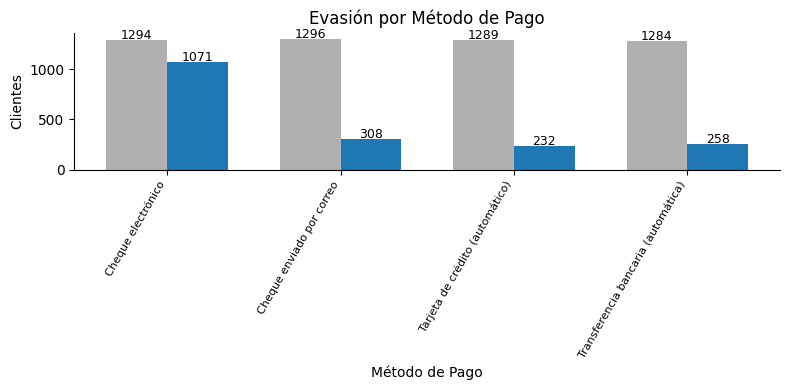

In [25]:
#Evasión por Método de pago

tabla_metodo_pago = pd.crosstab(df['Metodo_Pago'], df['Evasion'])

fig, ax = plt.subplots(figsize=(8,4))
ancho = 0.35
x = range(len(tabla_metodo_pago))

# Barras
ax.bar([i - ancho/2 for i in x], tabla_metodo_pago['No'], width=ancho, color='#B0B0B0')
ax.bar([i + ancho/2 for i in x], tabla_metodo_pago['Si'], width=ancho, color='#1F77B4')

# Valores
for i in x:
    ax.text(i - ancho/2, tabla_metodo_pago['No'].iloc[i] + 10, tabla_metodo_pago['No'].iloc[i], ha='center', fontsize=9)
    ax.text(i + ancho/2, tabla_metodo_pago['Si'].iloc[i] + 10, tabla_metodo_pago['Si'].iloc[i], ha='center', fontsize=9)

# Etiquetas y título
ax.set_xlabel('Método de Pago')
ax.set_ylabel('Clientes')
ax.set_title('Evasión por Método de Pago')
ax.set_xticks(x)
ax.set_xticklabels(tabla_metodo_pago.index, rotation=60, ha='right', fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

plt.savefig('/content/graficas/evasion_por_metodo_pago.png')
plt.show()




La gráfica muestra que los métodos de pago automáticos concentran menor evasión, mientras que el cheque electrónico presenta más cancelaciones.
Esto sugiere que **la automatización del pago ayuda a retener clientes.**

### Conteo de Evasión por variables numéricas

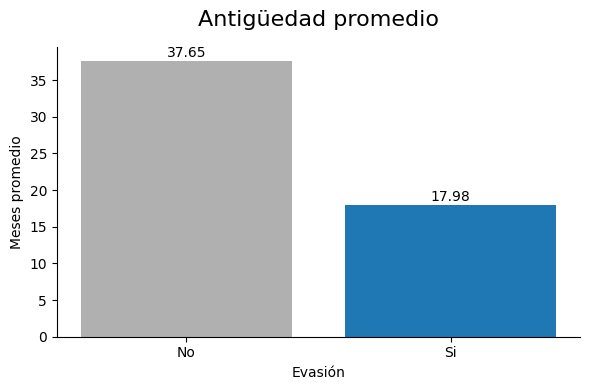

In [26]:
# Antigüedad promedio
tabla_tenure = df.groupby('Evasion')['Meses_Cliente'].mean().reset_index()

fig, ax = plt.subplots(figsize=(6,4))

# Barras
ax.bar('No', tabla_tenure.loc[tabla_tenure['Evasion']=='No','Meses_Cliente'].values[0],
       color='#B0B0B0')
ax.bar('Si', tabla_tenure.loc[tabla_tenure['Evasion']=='Si','Meses_Cliente'].values[0],
       color='#1F77B4')

# Valores
for i, row in tabla_tenure.iterrows():
    ax.text(row['Evasion'], row['Meses_Cliente'] + 0.5, round(row['Meses_Cliente'],2),
            ha='center', fontsize=10)

# Etiquetas y título
ax.set_xlabel('Evasión')
ax.set_ylabel('Meses promedio')
ax.set_title('Antigüedad promedio', fontsize=16, pad=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

plt.savefig('/content/graficas/antiguedad_promedio.png')
plt.show()


Los clientes que permanecen tienen en promedio 37.65 meses, mientras que los que cancelan solo casi 18 meses.
Esto confirma que **la evasión ocurre en los primeros meses**

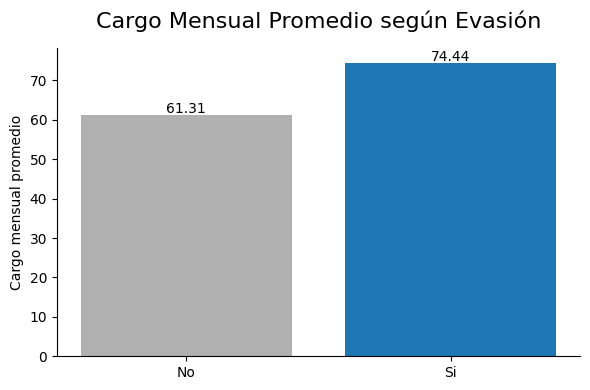

In [27]:
# Cargo mensual promedio según evasión
tabla_cargo = df.groupby('Evasion')['Cargo_Mensual'].mean().reset_index()

fig, ax = plt.subplots(figsize=(6,4))

# Barras
ax.bar('No', tabla_cargo.loc[tabla_cargo['Evasion']=='No','Cargo_Mensual'].values[0],
       color='#B0B0B0')
ax.bar('Si', tabla_cargo.loc[tabla_cargo['Evasion']=='Si','Cargo_Mensual'].values[0],
       color='#1F77B4')
# Valores
for i, row in tabla_cargo.iterrows():
    ax.text(row['Evasion'], row['Cargo_Mensual'] + 0.5, round(row['Cargo_Mensual'],2),
            ha='center', fontsize=10)
# Etiquetas y título
ax.set_xlabel('')
ax.set_ylabel('Cargo mensual promedio')
ax.set_title('Cargo Mensual Promedio según Evasión', fontsize=16, pad=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

plt.savefig('/content/graficas/cargo_mensual_promedio.png')
plt.show()

La gráfica muestra que los clientes que cancelan tienen un cargo mensual promedio más alto (74.44) que los que permanecen (61.31). Esto indica que montos más altos pueden aumentar el riesgo de evasión, mientras que los clientes con cargos menores tienden a quedarse

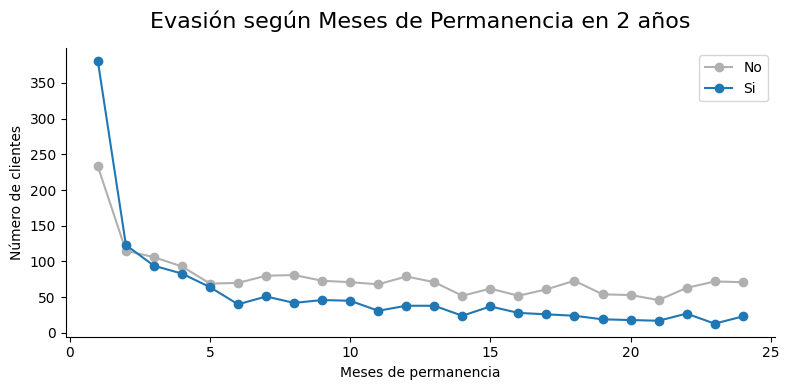

In [28]:
# Evasión según meses de permanencia en 2 años.
df_24 = df[df['Meses_Cliente'] <= 24]
df_line = df_24.groupby(['Meses_Cliente', 'Evasion']).size().reset_index(name='Cantidad')

no_ev = df_line[df_line['Evasion']=='No']
si_ev = df_line[df_line['Evasion']=='Si']

fig, ax = plt.subplots(figsize=(8,4))

ax.plot(no_ev['Meses_Cliente'], no_ev['Cantidad'], color='#B0B0B0', marker='o', label='No')
ax.plot(si_ev['Meses_Cliente'], si_ev['Cantidad'], color='#1F77B4', marker='o', label='Si')

# Etiquetas y título
ax.set_xlabel('Meses de permanencia')
ax.set_ylabel('Número de clientes')
ax.set_title('Evasión según Meses de Permanencia en 2 años', fontsize=16, pad=15)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()


plt.savefig('/content/graficas/evasion_meses_de_permanencia.png')
plt.show()



La gráfica muestra la distribución de clientes en 2 años según la evasión. Se observa que la mayoría de las cancelaciones (azul) ocurre en los primeros meses, especialmente en el primero, mientras que los clientes que permanecen (gris) tienden a tener mayor antigüedad.

# Relación entre Cuentas diarias y Evasión

In [29]:
# Agrupar por evasión y calcular estadísticas de Cuentas_Diarias
df.groupby('Evasion')['Cuentas_Diarias'].describe()


,count,mean,std,min,25%,50%,75%,max
Evasion,,,,,,,,
No,5163.0,2.043581,1.036486,0.6083,0.8367,2.1483,2.94915,3.9583
Si,1869.0,2.481378,0.822202,0.6283,1.8717,2.6550,3.14000,3.9450


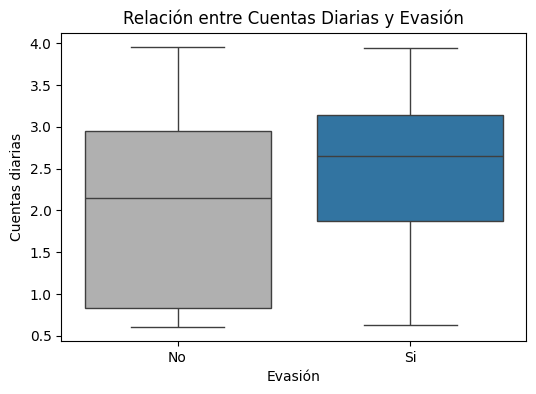

In [30]:
plt.figure(figsize=(6,4))

sns.boxplot(
    data=df,
    x='Evasion',
    y='Cuentas_Diarias',
    hue='Evasion',
    palette={'No':'#B0B0B0', 'Si':'#1F77B4'}
)

plt.title('Relación entre Cuentas Diarias y Evasión')
plt.xlabel('Evasión')
plt.ylabel('Cuentas diarias')
legend=False
plt.legend([],[], frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('/content/graficas/relacion_entre_cuentas_diarias_y_evasion.png')

plt.show()

La gráfica muestra que los clientes que presentan evasión tienen una cuenta diaria con mayor variabilidad y valores extremos más altos en comparación con los clientes que permanecen. Esto indica que la inestabilidad en el monto de la cuenta diaria está asociada a una mayor probabilidad de evasión.

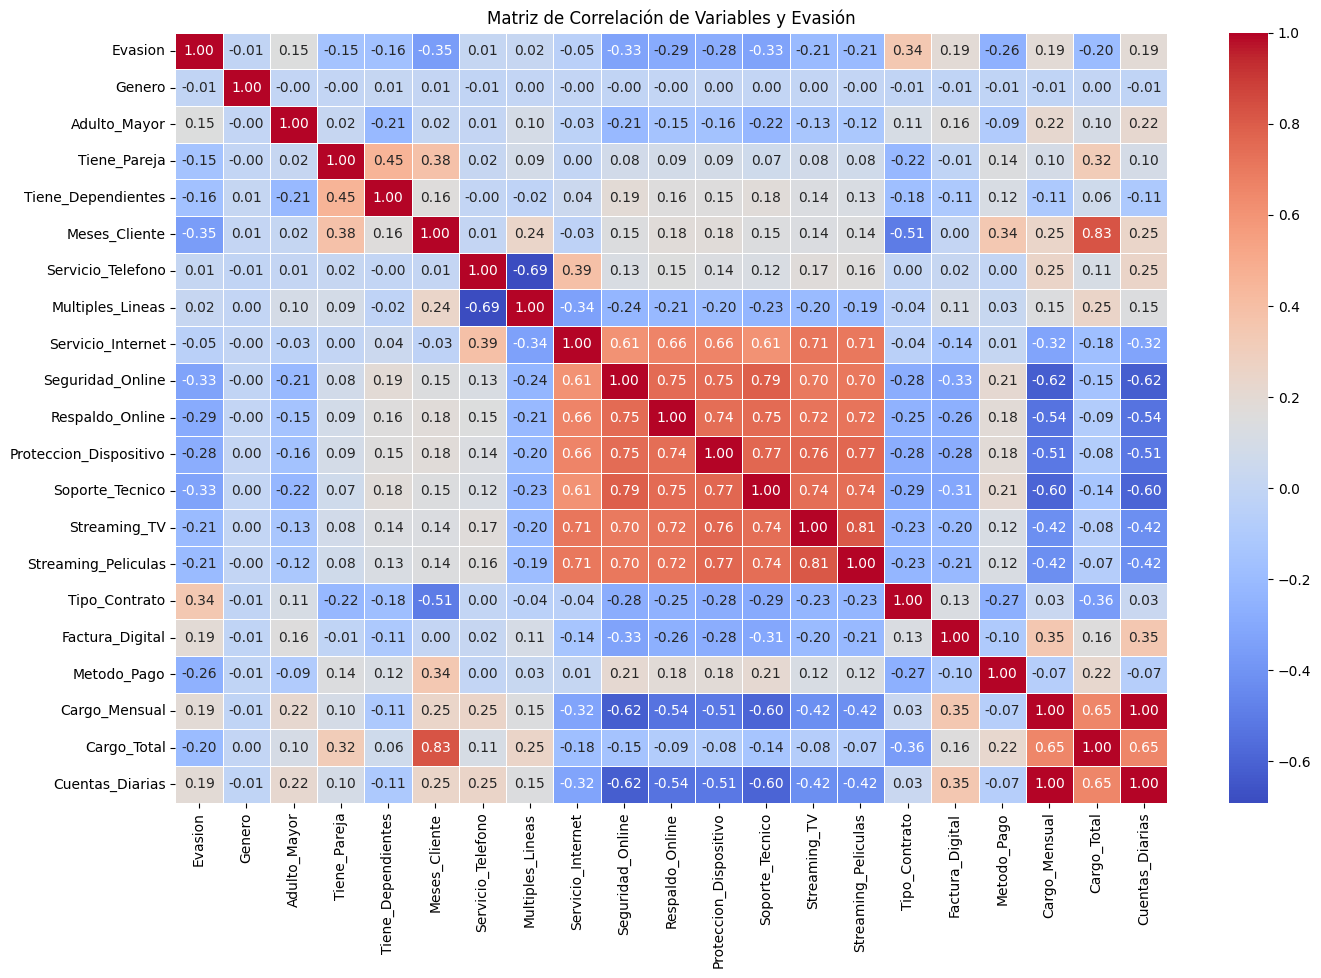

Evasion                   1.00
Tipo_Contrato             0.34
Cargo_Mensual             0.19
Cuentas_Diarias           0.19
Factura_Digital           0.19
Adulto_Mayor              0.15
Multiples_Lineas          0.02
Servicio_Telefono         0.01
Genero                   -0.01
Servicio_Internet        -0.05
Tiene_Pareja             -0.15
Tiene_Dependientes       -0.16
Cargo_Total              -0.20
Streaming_TV             -0.21
Streaming_Peliculas      -0.21
Metodo_Pago              -0.26
Proteccion_Dispositivo   -0.28
Respaldo_Online          -0.29
Soporte_Tecnico          -0.33
Seguridad_Online         -0.33
Meses_Cliente            -0.35


<Figure size 640x480 with 0 Axes>

In [31]:
df_corr = df.copy()

for col in df_corr.select_dtypes(include=['object']).columns:
    if col != 'Cliente_ID':
        df_corr[col] = df_corr[col].astype('category').cat.codes

# Matriz de correlación
correlation_matrix = df_corr.drop(columns=['Cliente_ID']).corr()

# Visualización
plt.figure(figsize=(16, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Matriz de Correlación de Variables y Evasión')
plt.show()

plt.savefig('/content/graficas/matriz_correlacion.png')


print(
    correlation_matrix['Evasion']
    .sort_values(ascending=False)
    .round(2)
    .to_string()
)


La evasión está asociada principalmente a contratos de corto plazo y a una mayor sensibilidad al costo, mientras que la permanencia se fortalece cuando el cliente acumula antigüedad y utiliza servicios adicionales que incrementan el valor percibido.



#INFORME FINAL

---

# INTRODUCCIÓN
---
El objetivo de este análisis es identificar patrones y factores asociados a la evasión de clientes en Telecom X. Comprender qué variables influyen en la cancelación de servicios para ayudar en la toma de decisiones estratégicas y mejorar la retención.

---

#LIMPIEZA Y TRATAMIENTO DE DATOS
1. Se importaron los datos y se normalizaron para mejor manejo de información.
2. Se revisa la información para detectar inconsistencias:

   - Info
   - Valores únicos
   - Valores duplicados
   - Datos vacíos
   - Valores Nulos

3. Se manejan incoherencias   
   - Charges.Total está como object/ se cambia a float64
   ``` python
        df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
   ```
   - Se eliminan datos vacíos de Churn y Charges.Total
    ``` python
        df['Churn'] = df['Churn'].replace('', np.nan)
        df = df.dropna(subset=['Churn'])

        df['Charges.Total'] = df['Charges.Total'].replace('', np.nan)
   ```
4. Se agrega columna Cuentas Diarias
5. Se estandarizan los datos (Se cambian nombres de columnas y traducción)

---



#ANÁLISIS EXPLORATORIO DE DATOS

Realizamos calculos: media, mediana, desviación estándar de las variables para entender mejor la tendencia y dispersión de los datos.

  - Distribución de Evasión de Clientes:
    Notamos que el 26.6% de los clientes han cancelado.

**Variables Categóricas**

  - Evasión por Tipo de Contrato:
      Se encuentra que los contratos mensuales tienen mayor cancelación que los contratos Anuales o Bienales.

  - Evasión por Genero:
      Detectamos que tanto hombres y mujeres presentan niveles similares de cancelación, por lo tanto no es relevante.

  - Evasión por Método de pago:
      Los pagos automáticos retienen mejor a los clientes que los cheques electrónicos.

**Conteo de Evasión por variables numéricas**

   - Antigüedad promedio:
      Los clientes que permanecen tienen en promedio 37.65 meses, mientras que los que cancelan solo casi 18 meses.
      Esto confirma que **la evasión ocurre en los primeros meses**

   - Cargo mensual promedio según evasión:
      Los clientes que cancelan tienen un cargo mensual promedio más alto (74.44) que los que permanecen (61.31). Esto indica que montos más altos pueden aumentar el riesgo de evasión, mientras que los clientes con cargos menores tienden a quedarse

   - Evasión según Meses de Permanencia (0-24 meses):
      Se observa que la mayoría de las cancelaciones ocurre en los primeros meses, especialmente en el primero, mientras que los clientes que permanecen tienden a tener mayor antigüedad.

Hicimos la relación entre la cuenta diaria y la evasión, se notó que los clientes que cancelan tienden a tener un comportamiento ligeramente distinto en sus cuentas diarias comparado con los clientes que permanecen.

---

#CONCLUSIONES E INSIGHTS

El análisis revela patrones claros en la evasión de clientes: más del 26% de los usuarios cancelan, concentrándose principalmente en los primeros meses de contratación.

Los clientes con contratos mensuales presentan mayor riesgo de evasión, mientras que los de planes anuales o más prolongados muestran mayor retención. Los cargos mensuales elevados se correlacionan con un incremento en la probabilidad de cancelación, mientras que los pagos automáticos contribuyen a la permanencia, mostrando que la comodidad y la percepción de valor son determinantes.

El género no representa un factor significativo, lo que indica que las estrategias deben enfocarse en comportamiento y valor percibido, no en características demográficas. La antigüedad promedio también evidencia que la fidelización temprana es crítica: quienes superan los primeros 12–18 meses tienen menor probabilidad de abandonar.

La relación directa de las cuentas diarias con la evasión confirma que los clientes con cuentas diarias más irregulares representan un segmento de alto riesgo, por lo que monitorear estos comportamientos permite anticipar la evasión y diseñar estrategias de retención más focalizadas y efectivas.

---

#RECOMENDACIONES

  -Optimizar la fidelización temprana: Crear programas de bienvenida, seguimiento personalizado y beneficios en los primeros 3–6 meses para reducir la evasión inicial.

  -Segmentar según tipo de contrato y cargo mensual: Incentivar contratos de mayor duración y ofrecer planes ajustados a la capacidad de pago del cliente para minimizar cancelaciones por percepción de alto costo.

  -Promover métodos de pago automáticos: Facilitar la suscripción recurrente mediante débitos automáticos y recordatorios digitales para aumentar la retención.

  -Monitoreo continuo de riesgos: Implementar dashboards que identifiquen clientes con alto riesgo de evasión según antigüedad, cargo y tipo de contrato, permitiendo acciones preventivas proactivas.

  -Estrategias personalizadas: Aplicar marketing predictivo basado en comportamiento de uso y valor del cliente para diseñar ofertas y beneficios que aumenten la satisfacción y la permanencia.